# Notes on Learning with High Dimensional Feature Spaces

### 2020 July 14 (ver 0.1)

Mario Boley
$\newcommand{\R}{\mathbb{R}}
\newcommand{\cM}{\mathcal{M}}
\newcommand{\range}[1]{\mathcal{R}(#1)}
\newcommand{\null}[1]{\mathcal{N}(#1)}$

## Setting and Math Recap

Our general setting is that we are given a data matrix $X \in \R^{n \times p}$ with

* $n$ rows/examples/observations $X_i \in \R^m$
* $p$ columns/features/predictors $(X^T)_i \in \R^n$

as well as a target/label/response vector $y \in \R^n$. Furthermore, we assume that $p > n$, i.e., we have more features than observations. However, we further assume that the given set of features is unneccesarily large and that the "true model" of the data is sparse. That is, we assume there is a subset of features $\cM_* \subseteq \{1, \dots, p\}$ such that the responses have been generated from the observations according to

$$y = \beta^T_* X_i + \epsilon_i$$ 

with a sparse model vector satisfying $\beta_{*,i} \neq 0$ iff $i \in \cM_*$ and random noise $\epsilon_i$. As we will see below, this setting occurs when we want to model an unknown relationship using a lot of speculative features.

Due the noise component, there usually won't be a parameter vector $\beta \in \R^n$ such that $X\beta = y$ exactly. In the terminology of linear algebra, our response vector $y$ won't be in the **range** (column space) of the data matrix, which is denoted

$$\range{X} = \{X\beta : \beta \in \R^N\} \enspace .$$

So we have to settle for paramters that approximate the reponses $X\beta \approx y$ with some error or **residual** vector $y - X\beta \neq 0$. If we assume furthermore that the noise component has been sampled i.i.d. according to a normal distribution with mean zero, the maximum likelihood parameter vectors (as we will see below there can be more than one) $\beta_\rm{ml} \in \R^p$ are minimising the sum of squared residuals

$$\sum_{i=1}^n (y_i - X^T_i\beta)^2$$

which we can write in matrix/vector notation as

$$\|X\beta - y\|^2 = (X\beta - y)^T(X\beta - y) \enspace .$$

Either from basic geometric considerations are using calculus, we can find that any parameter vector that minimises this objective function must have an residual (error) vector $y - X\beta$ that is orthogonal to the **range** (column space) of the data matrix, i.e., for all columns we must have that $((X^T)_i)^T(y - X\beta)=0$. Combining the $n$ linear equations into one system, and using matrix notation, leads to the famous **normal equations**

$$X^T X\beta_\rm{ls} = X^T y \enspace .$$

to describe *all* parameter vectors $\beta_\rm{ls}$ that minimise the least squares objective. We emphasise '*all*' here as it turns out that in our setting with $p > n$ the normal equations will have more than one solution.

## Example: Identifying the Law of Gravitation from Speculative Features

As a running example, let us consider the data-driven discovery of Newton's law of universal gravitation:

$$F = G\frac{m_1 m_2}{d}$$

where $F$ is the gravitational force acting between two objects, $m_1$ and $m_2$ are the masses of the first and the second object, $d$ is the distance between the centres of their masses, and $G \approx 6.674\times10^{-11}$ is the gravitational constant.

Let's assume that we don't know yet about the graviational law, but, for great cost, we can sample a few observations of pairs of planets and can *approximately* determine the gravitational force between them. Additionally, we can determine a host of speculative features for each planetary pair that could potentially "explain" the magnitude of the gravitational force.

The table below lists all variables we use in this example. Instead of observing real pairs of planets, we will synthetically sample some data. For each variable the table gives the distribution or formula used to obtain the corresponding value. The first three variables (position and the densities of planet 1 and 2) are latent, i.e., they are used to compute values of the observed features (and will cause some correlation between them) but they will not be directly accessible by our model. The feature variables are numbered according to their column index in the data matrix. 

| Feature | Variable | &nbsp;&nbsp;&nbsp;Symbol&nbsp;&nbsp;&nbsp; | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Unit&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | Distribution/Formula | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\beta_*$&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; |
| :- | :- | :-: | :-: | :-: | :-: |
| - | *position* | $p_1$, $p_2$ | $\rm{m}\times\rm{m}\times\rm{m}$ | $U(C_L)$ | - | 
| - | *density 1, 2* | $\rho_1$, $\rho_2$ | $\rm{kg}/\rm{m}^3$ | $\rm{Exp}(1/\rho_{\text{trr}})$ | - |
| - | grav. force | $F$ | $\rm{kg}~\rm{m} / \rm{s}^2$ | $G m_1 m_2 / d^2$ | - |
| $1$ | constant | $\rm{1}$ | - | $\delta_e$ | $\ln G$ |
| $2$, $3$ | mass 1, 2 | $m_1$, $m_2$ | $\rm{kg}$ | $(4/3)\pi r^3 \rho$ |  $1$, $1$ |
| $4$ | $L_2$-dist | $d$ | $\rm{m}$ | $\|p_1-p_2\|_2$ | $-2$ |
| $5$ | $L_1$-dist | $d_1$ | $\rm{m}$ | $\|p_1-p_2\|_1$ | $0$ |
| $6$ | $L_3$-dist | $d_3$ | $\rm{m}$ | $\|p_1-p_2\|_3$ | $0$ |
| $7$ | $L_\infty$-dist | $d_\infty$ | $\rm{m}$ | $\|p_1-p_2\|_\infty$ | $0$ |
| $8$, $9$ | radius 1, 2| $r_1$, $r_2$ | $\rm{m}$ | $\rm{Exp}(1/r_{\text{trr}})$ | $0$, $0$ |
| $10$, $11$ | atm. pressure 1, 2 | $P_1$, $P_2$ | $\rm{kg}~/~\rm{m}~\rm{s}^2$ | $\rm{Exp}(1/P_{\text{trr}})$ | $0$, $0$ |
| $12$, $13$ | inertia 1, 2 | $\rm{in}_1$, $\rm{in}_2$ | - | $\rm{Beta}(2, 2)$ | $0$, $0$ | 
| $14$, $15$ | tilt 1, 2 | $\rm{tl}_1$, $\rm{tl}_2$ | radians | $\pi \rm{Beta}(5, 2)$ | $0$, $0$ |
| $16$, $17$ | flattening 1, 2 | $\rm{fl}_1$, $\rm{fl}_2$ | - | $\rm{Beta}(1, 10)$ | $0$, $0$ |
| $18$, $19$ | rotation 1, 2 | $\rm{rt}_1$, $\rm{rt}_2$ | $\rm{s}$ | $\rm{Exp}(1/\rm{rot}_{\text{trr}})$ | $0$, $0$ |
| $20$ | mass sum | $m_1\!+\!m_2$ | $\rm{kg}$ | $m_1 + m_2$ | $0$ |
| $21$ | radius sum | $r_1\!+\!r_2$ | $\rm{m}$ | $r_1 + r_2$ | $0$ |
| $22$ | pressure sum | $P_1\!+\!P_2$ | $\rm{kg}~/~\rm{m}~\rm{s}^2$ | $P_1 + P_2$ | $0$ |
| $23$ | tilt sum | $\rm{tl}_1\!+\!\rm{tl}_2$ | radians | $\rm{tl}_1+\rm{tl}_2$ | $0$ |
| $24$ | rotation sum | $\rm{rt}_1\!+\!\rm{rt}_2$ | radians | $\rm{rt}_1+\rm{rt}_1$ | $0$ |
| $25$ | mass abs diff | $|m_1\!-\!m_2|$ | $\rm{kg}$ | $m_1 + m_2$ | $0$ |
| $26$ | radius abs diff | $|r_1\!-\!r_2|$ | $\rm{m}$ | $r_1 + r_2$ | $0$ |
| $27$ | pressure abs diff | $|P_1\!-\!P_2|$ | $\rm{kg}~/~\rm{m}~\rm{s}^2$ | $P_1 + P_2$ | $0$ |
| $28$ | tilt abs diff | $|\rm{tl}_1\!-\!\rm{tl}_2|$ | radians | $\rm{tl}_1+\rm{tl}_2$ | $0$ |
| $29$ | rotation abs diff | $|\rm{rt}_1\!-\!\rm{rt}_1|$ | radians | $\rm{rt}_1+\rm{rt}_1$ | $0$ |

We are going to fit a regression model with parameters $\beta \in \R^{n}$ with $n=29$ parameters of the multiplicative form:

$$F = \epsilon \prod_{j=1}^p f^{\beta_j}_j \enspace $$

where $\epsilon\sim \ln \rm{N}(0, 0.25)$ is a log-normal multiplicative noise term. In order to make this problem amenable to linear modelling we apply a log transform to our response and feature vectors and fit the log linear form:

$$\ln F = \ln \epsilon + \sum_{j=1}^p \beta_i f_i \enspace .$$

With this transformation, the gravitational law becomes

$$\ln F = \ln G + \ln m_1 + \ln m_2 - 2\ln d$$

and the true model is $\cM_* = \{1, 2, 3, 4\}$ with parameters $\beta_*=(\log G, 1, 1, -2)^T$.

In [10]:
import pandas as pd
from numpy import log
from math import pi, e
from random import uniform, expovariate, lognormvariate, betavariate
import random
random.seed(25)

LN_NOISE_VAR=0.25
G = 6.674e-11 #Graviational constant
BOX_LENGTH=1e11
MU_RADIUS=6371000
MU_DENSITY=5515

def vol(r): return 4/3*pi*r**3

def observation():
    x1, y1, z1 = uniform(-BOX_LENGTH/2, BOX_LENGTH/2), uniform(-BOX_LENGTH/2, BOX_LENGTH/2), uniform(-BOX_LENGTH/2, BOX_LENGTH/2)
    x2, y2, z2 = uniform(-BOX_LENGTH/2, BOX_LENGTH/2), uniform(-BOX_LENGTH/2, BOX_LENGTH/2), uniform(-BOX_LENGTH/2, BOX_LENGTH/2)
    d_2 = ((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)**0.5
    r1, r2 = expovariate(1/MU_RADIUS), expovariate(1/MU_RADIUS)
    rho1, rho2 = expovariate(1/MU_DENSITY), expovariate(1/MU_DENSITY)
    m1, m2 = vol(r1)*rho1, vol(r2)*rho2
    p1, p2 = expovariate(1/101.325), expovariate(1/101.325)
    in1, in2 = betavariate(2, 2), betavariate(2, 2)
    tilt1, tilt2 = pi*betavariate(5, 2), pi*betavariate(5, 2)
    fl1, fl2 = betavariate(1, 10), betavariate(1, 10)
    rot1, rot2 = expovariate(1/(24*3600)), expovariate(1/(24*3600))
    eps = lognormvariate(0, LN_NOISE_VAR)
    return {'F' : eps*G*m1*m2/d_2**2, '1': e, 'm1' : m1, 'm2' : m2, 'd_2': d_2,
            'd_1': abs(x1-x2)+abs(y1-y2)+abs(z1-z2), 'd_3': (abs(x1-x2)**3+abs(y1-y2)**3+abs(z1-z2)**3)**(1/3),
            'd_inf': max(abs(x1-x2), abs(y1-y2), abs(z1-z2)), 'r1': r1, 'r2': r2, 'p1': p1, 'p2': p2,
            'in1': in1, 'in2': in2, 'tlt1': tilt1, 'tlt2': tilt2, 'fl1' : fl1, 'fl2' : fl2, 'rot1': rot1, 'rot2': rot2,
            'm1+m2': m1+m2, 'r1+r2': r1+r2, 'p1+p2': p1+p2, 'tlt1+tlt2': tilt1+tilt2, 'rot1+rot2': rot1+rot2, 
            '|m1-m2|': abs(m1-m2), '|r1-r2|': abs(r1-r2), '|p1-p2|': abs(p1-p2), '|tlt1-tlt2|': abs(tilt1-tilt2),
            '|rot1-rot2|': abs(rot1-rot2)}
    
planets = pd.DataFrame([observation() for i in range(20)])
planets = planets.apply(log)
planets

,F,1,m1,m2,d_2,d_1,d_3,d_inf,r1,r2,...,m1+m2,r1+r2,p1+p2,tlt1+tlt2,rot1+rot2,|m1-m2|,|r1-r2|,|p1-p2|,|tlt1-tlt2|,|rot1-rot2|
0,34.519073,1.0,46.412003,59.394283,24.015789,24.472727,23.889915,23.753327,12.528055,16.784705,...,59.394285,16.798776,4.982815,1.433807,9.897935,59.394280,16.770434,3.528265,0.221046,9.452535
1,33.412329,1.0,47.474580,55.614238,23.031964,23.567870,22.862089,22.668015,12.842717,16.194743,...,55.614529,16.229158,5.410931,1.215185,11.919650,55.613946,16.159102,4.766469,0.524435,10.766972
2,31.149526,1.0,53.944793,50.520351,25.029798,25.481282,24.902507,24.730759,14.461840,13.528262,...,53.976841,14.793403,4.351436,1.360594,10.816453,53.911683,13.962375,4.261629,0.223452,9.823261
3,33.996860,1.0,54.427235,52.501992,24.972961,25.487340,24.819597,24.662431,14.570883,14.527676,...,54.563373,15.242660,4.880131,1.393494,13.179950,54.269598,11.407620,2.732548,-0.655375,11.659883
4,33.648570,1.0,52.145210,53.819012,24.433418,24.544255,24.429874,24.429721,14.040259,14.978255,...,53.990890,15.308574,5.895330,1.675696,12.116174,53.611333,14.481643,4.905458,-3.043778,12.050207
5,40.129094,1.0,56.730054,57.322005,25.268440,25.639316,25.206849,25.189068,15.853412,15.954369,...,57.762353,16.598311,5.965137,1.620874,11.106601,56.516257,13.611251,3.579237,-0.263956,10.777914
6,35.669595,1.0,53.873923,55.220822,24.837929,25.379087,24.662712,24.426023,15.260380,15.091379,...,55.451970,15.872592,6.664440,1.775869,12.347444,54.919655,13.399219,6.464854,-2.156930,11.973608
7,43.617969,1.0,57.797785,59.282488,24.854915,25.101278,24.833689,24.831111,17.142539,16.159829,...,59.486710,17.460480,5.940050,1.407663,10.853381,59.025569,16.673662,5.241046,-1.121058,8.881077
8,33.050087,1.0,53.166878,53.068229,24.927842,25.353457,24.828282,24.768565,14.746333,14.580812,...,53.811917,15.360141,5.695782,1.605708,11.636826,50.801774,12.866057,5.678177,-1.266688,11.194696
9,30.020770,1.0,58.582497,44.839901,25.021748,25.542848,24.866692,24.736970,16.544031,11.959959,...,58.582498,16.554192,5.960476,1.234323,11.753480,58.582496,16.533765,5.193460,0.582239,11.507112


It turns out that these meagre $20$ observations are enough to approximately reconstruct the graviational law provided that we select the true model (variables). Unsurprisingly, this model does not only fit our initial observations almost perfectly but also any number of new test observations that we generate with the same process.

In [99]:
import numpy as np

from numpy.linalg import solve
from numpy import mean as mu
from numpy import transpose as t

X = planets.iloc[:, 1:5]
y = planets.F

beta = solve(t(X)@X, t(X)@y)

test = pd.DataFrame([observation() for i in range(100)])
test = test.apply(log)
X_test = test.iloc[:, 1:5]
y_test = test.F

mse_train = sum((X@beta - y)**2)
var_train = sum((y - mu(y))**2)
score_train = (1-mse/var)

mse_test = sum((X_test@beta - y_test)**2)
var_test = sum((y_test - mu(y_test))**2)
score_test = (1-mse_test/var_test)

np.around(beta, 2), score_train, score_test

(array([-21.72,   1.01,   0.98,  -2.06]), 1.0, 0.9986354084809616)

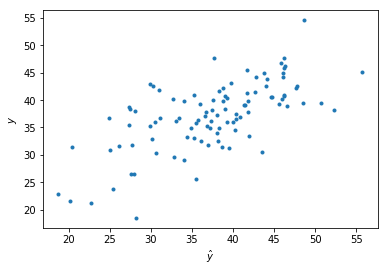

In [106]:
from matplotlib import pyplot as plt

plt.scatter(X_test@beta, y_test, marker='.')
plt.xlabel(r'$\hat{y}$')
plt.ylabel('$y$')
plt.show()

In contrast, if we don't perform variable selection, and just solve the least squares problem on the complete data matrix, we end up with a model that doesn't only look like gibberish, but that also has a strongly deterioated performance on our test observations. Note that still fits the original training observations well. So what happened here is the well known *overfitting* phenomenon.

In [107]:
X = planets.drop(columns=['F'])
X_test = test.drop(columns=['F'])

beta = solve(t(X)@X, t(X)@y)

mse = sum((X@beta - y)**2)
var = sum((y - mu(y))**2)
score = (1-mse/var)

mse_test = sum((X_test@beta - y_test)**2)
var_test = sum((y_test - mu(y_test))**2)
score_test = (1-mse_test/var_test)

beta, score, score_test

(array([ 1.52187746e+02,  7.96914388e-01, -3.17296043e-01, -3.53365962e+00,
        -2.19795437e+00,  2.22645737e+00, -7.32375520e-01,  1.32383415e+00,
         2.49005733e+00, -8.27642290e-02, -2.37443080e+00,  6.31307088e-02,
         4.12787114e+00,  3.74515175e+01,  4.04236678e+01,  5.62010218e-01,
         1.97759582e-01, -2.11014542e+00, -3.16734790e+00, -8.78035209e-01,
         7.16410115e-02,  4.02068356e+00, -8.93026292e+01,  6.01614736e+00,
         1.07323038e+00, -1.42164425e+00, -4.23250572e-01,  7.57341038e-01,
        -2.48882975e+00]),
 1.0,
 0.13204995173051182)

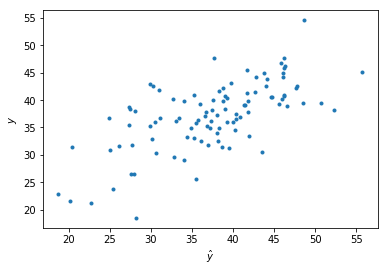

In [108]:
plt.scatter(X_test@beta, y_test, marker='.')
plt.xlabel(r'$\hat{y}$')
plt.ylabel('$y$')
plt.show()

## Problems for Solving the Least Squares Objective

Usually, we are happy to express the solution of the least squares objective as $\beta_\rm{LS}=(X^TX)^{-1}X^Ty$. **However, this assumes that the gram matrix $X^T X \in \R^{p \times p}$ of inner products of the feature vectors is invertible and in our setting $p > n$ this cannot be true (why?).**

In fact, this doesn't only happen when $p > n$ but also when we simple have linearly dependent columns. Let's fix a simple $2 \times 2$ example where this is the case.

In [295]:
import numpy as np
from numpy import array as m
from numpy import transpose as t
from numpy.linalg import pinv

X = m([[2, -2],
       [-1, 1]])

y = m([2, 1])

G = t(X)@X
G, t(X)@y, pinv(X)@y

(array([[ 5, -5],
        [-5,  5]]),
 array([ 3, -3]),
 array([ 0.3, -0.3]))

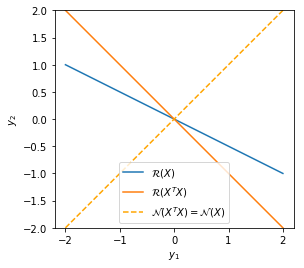

In [237]:
xx = np.linspace(-2, 2, 100)
yy_rX = X[1, 0]/X[0, 0] * xx
yy_rG = G[1, 0]/G[0, 0] * xx

fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.plot(xx, yy_r, label='$\mathcal{R}(X)$')
plt.plot(xx, yy_rG, label='$\mathcal{R}(X^TX)$')
plt.plot(xx, xx, label=r'$\mathcal{N}(X^TX)=\mathcal{N}(X)$', color='orange', linestyle='--')
plt.legend()
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.ylim(-2,2)
plt.show()

However, that does not mean that our least squares problem cannot be solved. **The normal equations always have a solution (why?)**. Our problem is that there are many (a whole subspace of) solutions.

Let's fix response vector $y = (2, 1)^T$. Computing $X^T y = (3, -3)^T$, we end up with the following normal equations:

$$
\begin{pmatrix}
5 & -5 \\
-5 & 5
\end{pmatrix}
\beta =
\begin{pmatrix}
3\\
-3
\end{pmatrix}
$$

Using one step of elimination we get 

$$
\begin{pmatrix}
5 & -5 \\
0 & 0
\end{pmatrix}
\beta =
\begin{pmatrix}
3\\
0
\end{pmatrix}
$$

and see that for our example we have that $5\beta_1 - 5\beta_2 = 3$ and, thus, $\beta_1 = \beta_2 + 0.6$. 

That means that our solutions are a line (affine subspace) corresponding to the null space of the gram matrix $\null{X^T X}$ shifted by an arbitrary solution $\beta_0$. Indeed, we can observe that all $\beta$ on the line 
$\left\{
\begin{pmatrix}
0.6\\
0
\end{pmatrix}
+ \alpha 
\begin{pmatrix}
1\\
1
\end{pmatrix}
: \alpha \in \R
\right\}$ 
have the same (minimal) sum of squared errors.

So ultimately we have to choose a solution. One reasonable choice is to go for the **minimum norm solution**, i.e., the uniquely defined parameter vector $\beta_\rm{mnls}$ with $X^TX \beta_\rm{mnls} = X^T y$ and $\|\beta_\rm{mnls}\|_2^2 \leq \|\beta\|_2^2$ for all $\beta$ with $X^TX \beta = X^T y$.


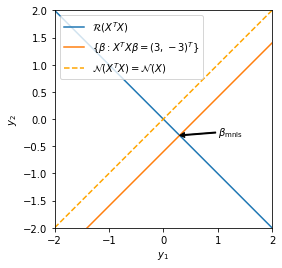

In [289]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.plot(xx, -xx, label='$\mathcal{R}(X^TX)$')
plt.plot(xx, xx - 0.6, label=r'$\{\beta: X^TX\beta=(3, -3)^T\}$')
plt.plot(xx, xx, label = r'$\mathcal{N}(X^TX)=\mathcal{N}(X)$', color='orange', linestyle='--')
ax.annotate(r'$\beta_{\mathrm{mnls}}$', xy=(0.3,-0.3), xytext=(1, -0.3), 
            arrowprops=dict(facecolor='black', headlength=5, headwidth=5, width=1, shrink=10))
plt.legend()
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.show()

This solution of the normal equation is produced by the **pseudo-inverse** $(X^TX)^+$, i.e.,
$\beta_\rm{mnls}=(X^TX)^+X^Ty$.

In [294]:
from numpy.linalg import pinv

y = m([2, 1])

pinv(G), pinv(G)@t(X)@y

(array([[ 0.05, -0.05],
        [-0.05,  0.05]]),
 array([ 0.3, -0.3]))

## Sure Independent Screening (SIS)

The Sure Independent Screening (SIS) approach is to find subset of columns (submodel)

$$\cM_\gamma = \{i: (X^Ty)_i \text{ among } \lfloor \gamma n \rfloor \text{ largest components of } X^Ty\}$$

That is, we bring the number of predictors down to (a fraction $\gamma \in (0,1]$ of) the number of observations and can then fit a model without the problems of numerical instability.

The sure screening property says that

$$\Pr(\cM_* \subseteq \cM_\gamma) \rightarrow 1 \enspace \text{ as } n \rightarrow \infty$$

(presumably for fixed $p/n$) where $\cM_* \subseteq \{1, \dots, p\}$ is assumed to be the true model according to which the data has been generated. That is, $y = \beta^T_* x + \epsilon$ with $\beta_i \neq 0$ iff $i \in \cM_*$.

We discussed the correlation coefficient
$$r_{x,y} = \frac{s_{x,y}}{s_x s_y}$$


In [38]:
cor = [(feat, planets.F.corr(X[feat])) for feat in X.iloc[:,1:]]
ranking = sorted(cor, key=lambda c: abs(c[1]), reverse=True)
ranking

[('r1+r2', 0.7061035246552009),
 ('m1+m2', 0.6031971753294267),
 ('m2', 0.594596916440197),
 ('r2', 0.5864864419591892),
 ('m1', 0.5830402208952368),
 ('r1', 0.5618953212073293),
 ('|p1-p2|', -0.5256349230199306),
 ('|m1-m2|', 0.4549299590203335),
 ('p1', 0.343838818726205),
 ('rot2', 0.29788676511867995),
 ('|r1-r2|', 0.27405272451598234),
 ('fl2', 0.26094436600368354),
 ('tlt1', 0.25441058122691),
 ('d_1', -0.20893885472549256),
 ('d_2', -0.18534280641765505),
 ('rot1+rot2', 0.17319992625886965),
 ('d_3', -0.16501900817657075),
 ('tlt1+tlt2', 0.14810101595206668),
 ('rot1', 0.13530882747707368),
 ('d_inf', -0.12721334140315768),
 ('p2', -0.115864045264944),
 ('tlt2', -0.11302235677537463),
 ('|tlt1-tlt2|', -0.09944752733984287),
 ('fl1', -0.06209655928607456),
 ('p1+p2', 0.056732747209843774),
 ('in2', -0.04969875349663308),
 ('|rot1-rot2|', -0.032958713265406996),
 ('in1', 0.005932734939915125)]

In [119]:
sis_features = [f for (f, _) in ranking[:19]]

X = planets.filter(items=['1']+sis_features)
X_test = test.filter(items=['1']+sis_features)

beta = solve(X, y)

mse = sum((y - X@beta)**2)
score = (1 - mse/var)**0.5

mse_test = sum((y_test - X_test@beta)**2)
score_test = (1 - mse_test/var_test)**0.5

[(f, w) for (f, w) in zip(['1']+sis_features, np.around(beta, 1))], score, score_test

([('1', -17.5),
  ('r1+r2', -3.0),
  ('m1+m2', 0.9),
  ('m2', -0.2),
  ('r2', 3.6),
  ('m1', 1.0),
  ('r1', 1.0),
  ('|p1-p2|', 0.8),
  ('|m1-m2|', 0.5),
  ('p1', -0.5),
  ('rot2', -1.0),
  ('|r1-r2|', -0.1),
  ('fl2', -0.6),
  ('tlt1', 4.9),
  ('d_1', 17.5),
  ('d_2', -47.5),
  ('rot1+rot2', 3.3),
  ('d_3', 26.2),
  ('tlt1+tlt2', -8.7),
  ('rot1', -2.1)],
 1.0,
 0.8183104857595822)

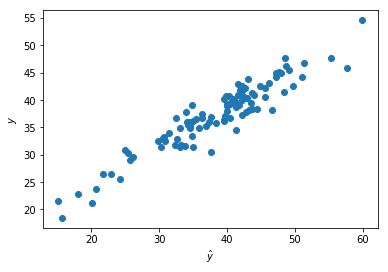

In [110]:
plt.scatter(X_test@beta, y_test)
plt.xlabel(r'$\hat{y}$')
plt.ylabel('$y$')
plt.show()

In [132]:
from sklearn.linear_model import OrthogonalMatchingPursuit

X = planets.filter(items=sis_features)
X_test = test.filter(items=sis_features)

omp = OrthogonalMatchingPursuit(8, fit_intercept=True, normalize=False)
omp.fit(X, y)

omp.predict(X_test)

[('1', omp.intercept_)]+[(f, w) for (f,w) in zip(sis_features, np.around(omp.coef_, 1)) if w != 0], omp.score(X, y), omp.score(X_test, y_test)

([('1', -20.715657124431644),
  ('m2', 1.0),
  ('m1', 1.0),
  ('|p1-p2|', -0.1),
  ('fl2', -0.1),
  ('d_3', -2.1),
  ('rot1', -0.1)],
 0.9983828085816475,
 0.9976814191351743)

In [60]:
beta=pinv(X)@y
np.around(beta, 1)

NameError: name 'pinv' is not defined

In [638]:
from numpy import identity
from numpy.linalg import inv, solve

I = identity(X.shape[1])

beta = solve(t(X)@X + 1000*I, t(X)@y)
beta
sorted(range(28), key=lambda i: abs(beta[i]), reverse=True)

[1,
 2,
 19,
 24,
 7,
 8,
 26,
 20,
 18,
 9,
 25,
 23,
 17,
 16,
 6,
 5,
 3,
 4,
 27,
 13,
 21,
 15,
 10,
 22,
 12,
 14,
 0,
 11]

In [626]:
beta=pinv(X.iloc[:, :4])@y
beta

array([-21.71777433,   1.01278492,   0.98329308,  -2.0607104 ])

In [618]:
log(G)

-23.43021664260532

In [673]:
from sklearn.linear_model import OrthogonalMatchingPursuit

omp = OrthogonalMatchingPursuit(4, fit_intercept=False, normalize=False)
omp.fit(X,y)
omp.coef_

array([ 0.        ,  0.67266439,  0.81298322,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.71364629,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -1.06764424,  0.        ,  0.        ])

In [672]:
from sklearn.linear_model import Lars

lars = Lars(n_nonzero_coefs=4, fit_intercept=False, normalize=False)
lars.fit(X,y)
lars.coef_

array([ 0.        ,  0.6969881 ,  0.81312064,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.81488412,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])